# Test Hypothesis by Simulating Statistics
## Mini-Lab: Hypothesis Testing

Welcome to your next mini-lab! Go ahead an run the following cell to get started. You can do that by clicking on the cell and then clickcing `Run` on the top bar. You can also just press `Shift` + `Enter` to run the cell.

In [1]:
from datascience import *
import numpy as np
import otter

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

grader = otter.Notebook("m7_l1_tests")

In the previous two labs we've analyzed some data regarding COVID-19 test cases. Let's continue to analyze this data, specifically _claims_ about this data. Once again, we'll be be using ficitious statistics from Blockeley University.

Let's say that Blockeley data science faculty are looking at the spread of COVID-19 across the realm of Minecraft. We have very specific data about Blockeley and the rest of Cubefornia but other realms' data isn't as clear cut or detailed. Let's say that a neighboring village has been reporting a COVID-19 infection rate of 26%. Should we trust these numbers?

Regardless of whether or not you believe these claims, the job of a data scientist is to definitively substantiate or disprove such claims using data. You have access to the test results of similar sized villages nearby and come up with the brilliant idea of running a hypothesis test. Let's go ahead and load it! Run te cell below to import this data. If you want to explore this data further, go ahead and group by both columns! An empty cell is provided for you to do this.

In [2]:
test_results = Table.read_table("../datasets/covid19_village_tests.csv")
test_results.show(5)

Test Result,Village Number
negative,4
negative,16
positive,16
negative,3
positive,4


In [17]:
test_results.group(test_results.labels)

Test Result,Village Number,count
negative,0,2191
negative,1,2000
negative,2,1935
negative,3,2049
negative,4,1842
negative,5,1835
negative,6,2014
negative,7,1938
negative,8,2192
negative,9,2140


From here we can formulate our **Null Hypothesis** and **Alternate Hypothesis** Our *null hypothesis* is that this village truly has a 26% infection rate amongst the populations. Our *alternate hypothesis* is that this village does not in actuality have a 26% infection rate - it's way too low. Now we need our test statistic. Since we're looking at the infection rate in the population, our test statistic should be given by the following formula:

$$\text{Test Statistic} = \frac{\text{Number of Positive Cases}}{\text{Total Number of Cases}}$$

We've started the function declaration for you. Go ahead and complete `proportion_positive` to calculate this test statistic.

*Note*: Check out `np.count_nonzero` and built-in `len` function! These should be helpful for you.

In [24]:
np.count_nonzero(test_results.column("Test Result") == "positive")

13470

In [25]:
def proportion_positive(test_results):
    numerator = np.count_nonzero(test_results == "positive")
    denominator = len(test_results)
    return numerator / denominator

In [ ]:
grader.check("q1")

If you grouped by `Village Number` before, you would realize that there are roughly 3000 tests per village. Let's now create functions that will randomly take 3000 tests from the `test_results` table and to apply our test statistic. Complete the `sample_population` and `apply_statistic` functions below!

The `sample_population` function will take a `population_table`. This will be a table with all the data we want and will return a new table that has been sampled from this `population_table`. Please note that `with_replacement` should be `False`.

The `apply_statistic` function will take in a `sample_table`, `column_name`, and `statistic_function`. The `sample_table` will be a table full of samples taken from a population table, the `column_name` will be the name of the column containing the data of interest, and the `statistic_function` which will be the test statistic that we will use. This function will return the result of using the `statistic_function` on the `sample_table`.

In [26]:
def sample_population(population_table):
    sampled_population = population_table.sample(3000, with_replacement=False)
    return sampled_population


def apply_statistic(sample_table, column_name, statistic_function):
    return statistic_function(sample_table.column(column_name))

In [ ]:
grader.check("q2")

Now for the simulation portion! Complete the for loop below and fill in a reasonable number for the `iterations` variable. The `iterations` variable will determine just how many random samples that we will take in order to test our hypotheses. There is also code that will visualize your simulation and give you data regarding your simulation vs. the null hypothesis.

Out of the 1000 simulations, roughly 0.8% of test statistics are less than our null hypothesis of a 26.0% infection rate.


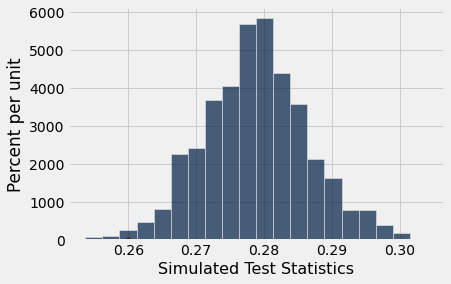

In [29]:
# Simulation code below. Fill out this portion!

iterations = 1000
simulations = make_array()

for iteration in np.arange(iterations):
    sample_table = sample_population(test_results)
    test_statistic = apply_statistic(sample_table, "Test Result", proportion_positive)
    simulations = np.append(simulations, test_statistic)
    

# This code is to tell you what percentage of our simulations are at or below the null hypothesis
# There's no need to fill anything out but it is good to understand what's going on!

null_hypothesis = 0.26
num_below = np.count_nonzero(simulations <= null_hypothesis) / iterations
print(f"Out of the {iterations} simulations, roughly {round(num_below * 100, 2)}% of test statistics " +
      f"are less than our null hypothesis of a {null_hypothesis * 100}% infection rate.")


# This code is to graph your simulation data and where our null hypothesis lies
# There's no need to fill anything out but it is good to understand what's going on!


simulation_table = Table().with_column("Simulated Test Statistics", simulations)
simulation_table.hist(bins=20)
plots.scatter(null_hypothesis, 0, color='red', s=30);

In [ ]:
grader.check("q3")

Given our hypothesis test, what can you conclude about the village that reports having a 26% COVID-19 infection rate? Has your hypothesis been proven or disproven? Do you now trust or distrust these numbers? And if you do distrust these numbers, what do you think went wrong in the reporting?

Congratulations on finishing! Run the next cell to make sure that you passed all of the test cases.

In [ ]:
grader.check_all()